In [4]:
import os
import sys
import dask
import zarr
import numpy as np
import xarray as xr
from glob import glob
# import wrf

In [3]:
sys.path.insert(0, os.path.realpath('../libs/'))
import plevel_utils as pu

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

## Variable info

In [6]:
WRF_dir = '/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/C404/C404_GP_{}.zarr'

In [7]:
year = 1980

In [20]:
ds_WRF = xr.open_zarr(WRF_dir.format(year))
ds_WRF_6H = ds_WRF.isel(time=slice(None, None, 6))

In [22]:
varname_init = [
    'WRF_P', 'WRF_U', 'WRF_V', 'WRF_T', 'WRF_Q_tot_05', 
    'WRF_MSLP', 'WRF_T2', 'WRF_TD2', 'WRF_U10', 'WRF_V10', 'WRF_PWAT_05', 'WRF_IVT_U', 'WRF_IVT_V'
]

varname_4d = ['WRF_P', 'WRF_U', 'WRF_V', 'WRF_T', 'WRF_Q_tot_05']

ds_WRF_6H = ds_WRF_6H[varname_init]
ds_WRF_6H = ds_WRF_6H.chunk({'time': -1})

In [ ]:
varnames = list(ds_WRF_6H.keys())
# zarr encodings
dict_encoding = {}

chunk_size_3d = dict(chunks=(6, 336, 336))
chunk_size_4d = dict(chunks=(6, 15, 336, 336))

compress = zarr.Blosc(cname='zstd', clevel=1, shuffle=zarr.Blosc.SHUFFLE, blocksize=0)

for i_var, var in enumerate(varnames):
    if var in varname_4d:
        dict_encoding[var] = {'compressor': compress, **chunk_size_4d}
    else:
        dict_encoding[var] = {'compressor': compress, **chunk_size_3d}

save_name = f'/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/dscale/C404_dscale_GP_{year}.zarr'
print(save_name)
# ds_WRF_6H.to_zarr(save_name, mode='w', consolidated=True, compute=True, encoding=dict_encoding)

/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/dscale/C404_dscale_GP_1980.zarr


In [9]:
ds = xr.open_zarr(save_name)

In [11]:
print(ds.isnull().any().to_array().any().compute().item())

False


In [13]:
WRF_Q = ds['WRF_Q_tot_05'].isel(time=999).values

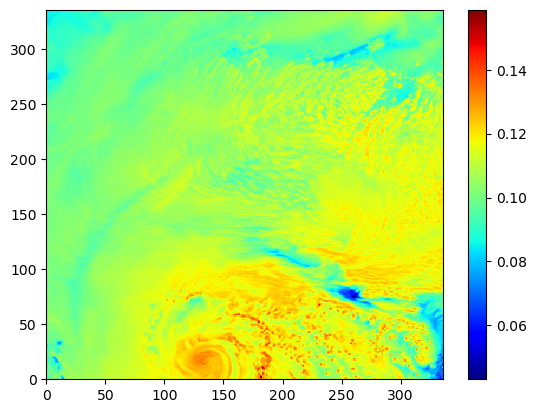

In [24]:
plt.pcolormesh(WRF_Q[5, ...], cmap=plt.cm.jet)
plt.colorbar()